In [1]:
import numpy as np
import emcee
import dlsfunctions as dls
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
r = 2.24e-09
diameter = r * 2
sigma = 1e-10

m = 20
c = 1
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

d = np.linspace(9e-10, 7e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

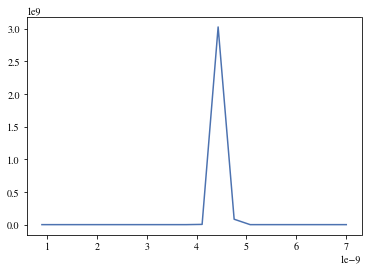

In [31]:
plt.plot(d, f_1)

In [32]:
theta_input = np.append(f_1, beta)

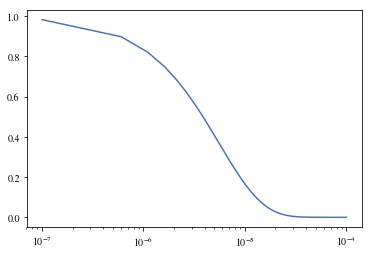

In [33]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)
plt.semilogx(time_in, sim_data)

In [34]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [35]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [36]:
start_pos

[array([1.51297429e-04, 1.02097692e-06, 1.96315239e-05, 5.82058579e-05,
        1.21066742e-04, 1.30426172e-05, 2.91635335e-05, 1.12444515e-04,
        1.33386641e-04, 1.50734204e-01, 3.69665547e+06, 3.02824563e+09,
        8.28117332e+07, 7.55983148e+01, 9.98374909e-05, 4.00636826e-05,
        2.97325577e-04, 6.26329684e-05, 5.02446122e-05, 6.97059449e-06,
        1.00009466e+00]),
 array([1.14952894e-04, 1.73072294e-04, 1.86132440e-05, 5.70202996e-05,
        3.66955532e-06, 6.86061039e-05, 1.07841174e-04, 3.72752043e-05,
        7.49584376e-06, 1.50657718e-01, 3.69665547e+06, 3.02824563e+09,
        8.28117332e+07, 7.55983053e+01, 1.07153049e-04, 1.74018627e-04,
        1.77110274e-04, 5.85525846e-05, 8.03102010e-05, 1.40699987e-04,
        1.00002480e+00]),
 array([5.47918487e-05, 1.58880051e-04, 4.23398737e-06, 1.77019923e-05,
        7.79038745e-05, 1.00647092e-04, 9.58137213e-05, 1.54354395e-04,
        1.49629750e-04, 1.50776474e-01, 3.69665547e+06, 3.02824563e+09,
        8.28

plt.plot(d, start_pos[0][0:20])

plt.plot(d, start_pos[5][0:20])

plt.plot(d, start_pos[20][0:20])

In [37]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [38]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.37533333, 0.36166667, 0.37266667, 0.36666667, 0.36933333,
       0.34366667, 0.38066667, 0.37966667, 0.364     , 0.37033333,
       0.37733333, 0.36133333, 0.379     , 0.36233333, 0.37166667,
       0.378     , 0.34466667, 0.378     , 0.36666667, 0.34666667,
       0.35366667, 0.36033333, 0.36966667, 0.36633333, 0.36666667,
       0.383     , 0.35866667, 0.371     , 0.36      , 0.37333333,
       0.37466667, 0.36733333, 0.38233333, 0.364     , 0.36      ,
       0.37166667, 0.37266667, 0.38466667, 0.35233333, 0.36466667,
       0.37733333, 0.37466667, 0.35933333, 0.369     , 0.37233333,
       0.36866667, 0.344     , 0.35766667, 0.37366667, 0.35933333,
       0.341     , 0.37666667, 0.37766667, 0.35833333, 0.35633333,
       0.37366667, 0.36233333, 0.379     , 0.35233333, 0.36033333,
       0.361     , 0.351     , 0.35733333, 0.371     , 0.382     ,
       0.382     , 0.37266667, 0.382     , 0.373     , 0.38266667,
       0.38466667, 0.36      , 0.36466667, 0.36566667, 0.376  

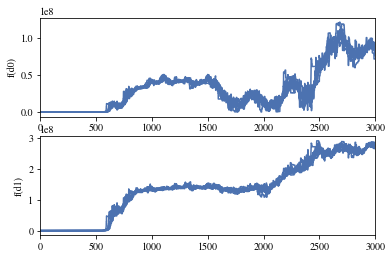

In [39]:
dls.view_burnin_plot(result, 0, 1)

In [ ]:
dls.view_burnin_plot(result, 2, 3)

In [ ]:
dls.view_burnin_plot(result, 4, 5)

In [ ]:
dls.view_burnin_plot(result, 6, 7)

chained_sampler = dls.chain(result, 4300, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)

inferred_f = dls.get_infer_f(samples_df, m)

inferred_f.shape

plt.plot(d, inferred_f)

In [40]:
samples = result.chain[:,2600:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [41]:
q = q.quantile([0.5], axis=0)
q

,beta,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),...,f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.5,0.648633,8.845378e+07,2.666140e+08,1.759668e+08,3.166932e+09,4.632228e+08,3.125144e+08,1.047180e+08,3.925625e+08,6.187170e+06,...,1.854996e+07,5.576312e+07,7.531075e+06,1.816777e+08,3.046324e+07,1.000236e+07,1.031036e+07,7.130790e+06,2.209316e+08,1.761228e+08


In [42]:
q = q.values
q = q.flatten()
q = q[0:20]

In [43]:
q.shape

(20,)

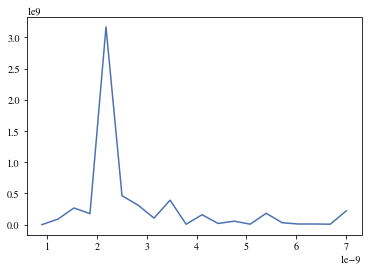

In [44]:
plt.plot(d, q)

In [45]:
dls.check_distribution_norm(q, d[1]- d[0])

1.7875397010133545

In [46]:
infer_g2 = dls.g2(np.append(q, 1), d, m, gamma, time_in)

In [ ]:
plt.semilogx(time_in, infer_g2, label='Inferred g2')
plt.semilogx(time_in, sim_data, 'r', label='Simulated data')
plt.legend()

In [ ]:
plt.semilogx(time_in, sim_data)

In [ ]:
diameter2 = diameter - 3e-9
f_2 = dls.generate_distribution(d, diameter2, sigma, 1)

In [ ]:
plt.plot(d, f_2)

In [ ]:
theta_input2 = np.append(f_2, beta)
sim_data2 = dls.g2(theta_input2, d, gamma, time_in)